## M345SC 2019 Lab 4

### Task 1: Shortest paths from BFS

The BFS code developed in lecture finds all reachable nodes from a source and computes the distance of the shortest path from the source to each reachable node:

In [1]:
import networkx as nx

def bfs(G,s):
    """
    Input:
    G: networkx graph
    x: source node

    Output:
    L2: Labels for all nodes in graph, 0=unreachable from source, 1=reachable
    L3: Shortest distance from source to nodes in graph
    """

    L1 = list(G.nodes) #Assumes nodes are numbered from 0 to N-1
    L2 = [0 for l in L1] #Labels
    L3 = [-1000 for l in L1] #Distances
    L4 = [[] for l in L1] #Paths 
    Q=[]
    Q.append(s)
    L2[s]=1
    L3[s]=0
    L4[s] = [s]
    while len(Q)>0:
        x = Q.pop(0) #remove node from front of queue
        print("***x=",x,' ***')
        for v in G.adj[x].keys():
            if L2[v]==0:
                Q.append(v) #add unexplored neighbors to back of queue
                L2[v]=1
                L3[v]=1+L3[x]
                #add code here
            
            print("v=",v)
            print("Q=",Q)
    return L2,L3

1. Modify the function above so that it returns a list, *L4*, whose *i+1th* element, *L4[i]* contains a list of nodes for the shortest path between the source and node *i*. For example, L4=[[0],[0,2,3,1],[0,2],[0,3]] would indicate that the shortes path between nodes 0 and 1 is 0->2->3->1. 

In [7]:
#New function here
def bfs2(G,s):
    """
    Input:
    G: networkx graph
    x: source node

    Output:
    L2: Labels for all nodes in graph, 0=unreachable from source, 1=reachable
    L3: Shortest distance from source to nodes in graph
    """

    L1 = list(G.nodes) #Assumes nodes are numbered from 0 to N-1
    L2 = [0 for l in L1] #Labels
    L3 = [-1000 for l in L1] #Distances
    L4 = [[] for l in L1] #Paths 
    Q=[]
    Q.append(s)
    L2[s]=1
    L3[s]=0
    L4[s] = [s]
    while len(Q)>0:
        x = Q.pop(0) #remove node from front of queue
        print("***x=",x,' ***')
        for v in G.adj[x].keys():
            if L2[v]==0:
                Q.append(v) #add unexplored neighbors to back of queue
                L2[v]=1
                L3[v]=1+L3[x]
                L4[v].extend(L4[x])
                L4[v].append(v)
            print("v=",v)
            print("Q=",Q)
    return L2,L3,L4

2. Test your function with a modestly-sized Barabasi-Albert graph and verify that it computes shortest-paths correctly:

Populating the interactive namespace from numpy and matplotlib
***x= 4  ***
v= 5
Q= [5]
***x= 5  ***
v= 0
Q= [0]
v= 1
Q= [0, 1]
v= 2
Q= [0, 1, 2]
v= 3
Q= [0, 1, 2, 3]
v= 4
Q= [0, 1, 2, 3]
***x= 0  ***
v= 5
Q= [1, 2, 3]
***x= 1  ***
v= 5
Q= [2, 3]
***x= 2  ***
v= 5
Q= [3]
***x= 3  ***
v= 5
Q= []
[[4, 5, 0], [4, 5, 1], [4, 5, 2], [4, 5, 3], [4], [4, 5]]


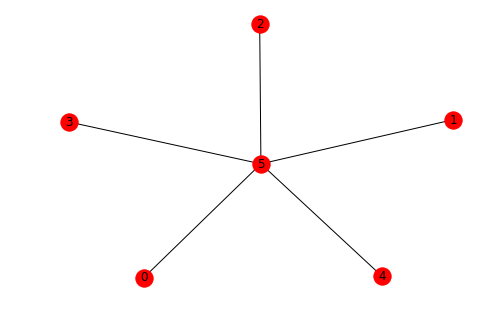

In [10]:
#Add code here
%pylab inline
G = nx.barabasi_albert_graph(6,5)
s = 4
nx.draw(G, with_labels=True)
L2, L3, L4 = bfs2(G,s)
print(L4)

### Task 2: Code performance and memory

As you move to larger problems, memory usage becomes an increasingly important consideration when developing and analyzing codes. Generally, we wish to use as little memory as possible, but there are more subtle issues that can pop up as well.
Consider simple calculations with matrices. 2-D Numpy arrays store elements in *row-major* order which can influence the performance of seemingly similar operations with numpy arrays. Row-major order means that elements (i,j) and (i,j+1) are typically stored in adjacent locations in memory.

1) Construct a large *n x n* random matrix and: i) iterate across the rows of the matrix computing the standard deviation of each column and ii) iterate across the columns of the matrix computing the standard deviation of each row. Compare the walltime required by the two cases for a few different values of *n*. Is one case noticeably faster for large *n*?

In [13]:
import numpy as np
from time import time
#Add code here

for n in range(1000, 10001, 1000):
    M = np.random.randint(10, size=(n,n))

    # standard deviation of each column
    t1 = time()
    for i in range(n):
        x = np.std(M[:,i])

    t2 = time()
    dt1 = t2-t1

    #standard deviation of each row
    t1 = time()
    for i in range(n):
        x = np.std(M[i,:])

    t2 = time()
    dt2 = t2-t1

    print("n=",n, "dt1=", dt1, "dt2=", dt2, "dt1-dt2=", dt1-dt2)

n= 1000 dt1= 0.03870201110839844 dt2= 0.02725362777709961 dt1-dt2= 0.011448383331298828
n= 2000 dt1= 0.10865306854248047 dt2= 0.06832003593444824 dt1-dt2= 0.04033303260803223
n= 3000 dt1= 0.226060152053833 dt2= 0.09877705574035645 dt1-dt2= 0.12728309631347656
n= 4000 dt1= 0.3820159435272217 dt2= 0.13720297813415527 dt1-dt2= 0.2448129653930664
n= 5000 dt1= 0.5540010929107666 dt2= 0.18628787994384766 dt1-dt2= 0.36771321296691895
n= 6000 dt1= 0.8184750080108643 dt2= 0.2443859577178955 dt1-dt2= 0.5740890502929688
n= 7000 dt1= 1.0778708457946777 dt2= 0.2971808910369873 dt1-dt2= 0.7806899547576904
n= 8000 dt1= 2.355408191680908 dt2= 0.3659999370574951 dt1-dt2= 1.989408254623413
n= 9000 dt1= 1.8562610149383545 dt2= 0.42545366287231445 dt1-dt2= 1.43080735206604
n= 10000 dt1= 2.640446901321411 dt2= 0.5235552787780762 dt1-dt2= 2.116891622543335


2) Now, repeat the calculations above, but replace the loops across rows or columns with the built-in method for computing standard deviations with numpy arrays. Do the timing results change?

In [14]:
import numpy as np
from time import time
#add code here

for n in range(1000, 10001, 1000):
    M = np.random.randint(10, size=(n,n))

    # standard deviation of each column
    t1 = time()
    x = np.std(M, axis=0)

    t2 = time()
    dt1 = t2-t1

    #standard deviation of each row
    t1 = time()
    x = np.std(M, axis=1)

    t2 = time()
    dt2 = t2-t1

    print("n=",n, "dt1=", dt1, "dt2=", dt2, "dt1-dt2=", dt1-dt2)

n= 1000 dt1= 0.02539801597595215 dt2= 0.004485130310058594 dt1-dt2= 0.020912885665893555
n= 2000 dt1= 0.03146076202392578 dt2= 0.017031192779541016 dt1-dt2= 0.014429569244384766
n= 3000 dt1= 0.07766389846801758 dt2= 0.040760040283203125 dt1-dt2= 0.03690385818481445
n= 4000 dt1= 0.1412029266357422 dt2= 0.07501578330993652 dt1-dt2= 0.06618714332580566
n= 5000 dt1= 0.21271991729736328 dt2= 0.21216416358947754 dt1-dt2= 0.0005557537078857422
n= 6000 dt1= 0.39585328102111816 dt2= 0.35921812057495117 dt1-dt2= 0.03663516044616699
n= 7000 dt1= 0.49622297286987305 dt2= 0.4061129093170166 dt1-dt2= 0.09011006355285645
n= 8000 dt1= 0.6234450340270996 dt2= 0.5327889919281006 dt1-dt2= 0.09065604209899902
n= 9000 dt1= 0.8222322463989258 dt2= 0.7729289531707764 dt1-dt2= 0.049303293228149414
n= 10000 dt1= 0.9050648212432861 dt2= 0.7782857418060303 dt1-dt2= 0.12677907943725586
